In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install datasets # Installing the datasets library (https://huggingface.co/docs/datasets/index)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 521.2/521.2 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 9.9 MB/s eta 0:00:00


In [ ]:
!pip install transformers # Installing the transformers library (https://huggingface.co/docs/transformers/index)

In [ ]:
!pip install evaluate # Installing the evaluate library (https://huggingface.co/docs/evaluate/main/en/index)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 2.1 MB/s eta 0:00:00


In [ ]:
!pip install rouge-score # Installing rouge-score library (https://pypi.org/project/rouge-score/)

  Preparing metadata (setup.py) ... done
  Created wheel for rouge-score: filename=rouge_score-0.1.2-py3-none-any.whl size=24933 sha256=01577ab608a7b0a549ef36c9950075234f113939ee0e5e7c89b40d14d22c9399
  Stored in directory: /root/.cache/pip/wheels/5f/dd/89/461065a73be61a532ff8599a28e9beef17985c9e9c31e541b4
Successfully built rouge-score


In [ ]:
!pip install py7zr # Installing library to save zip archives (https://pypi.org/project/py7zr/)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 17.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 412.3/412.3 kB 20.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.9/138.9 kB 18.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 17.6 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import os
import torch
import tensorflow as tf
from tqdm import tqdm
import re
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (Embedding, LSTM, Concatenate, Dropout, TimeDistributed,
                                     Input, Dense, Bidirectional, Layer)
from tensorflow.keras.utils import Sequence
from tensorflow.keras.utils import Progbar
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.offline import init_notebook_mode


In [ ]:

# Importing Libraries

# Data Handling
import pandas as pd
import numpy as np
from datasets import Dataset, load_metric
import shutil

# Data Visualization
import plotly.express as px
import plotly.graph_objs as go
import plotly.subplots as sp
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
import plotly.io as pio
from IPython.display import display
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

# Statistics & Mathematics
import scipy.stats as stats
import statsmodels.api as sm
from scipy.stats import shapiro, skew, anderson, kstest, gaussian_kde,spearmanr
import math

# Hiding warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Checking if GPU is available
if torch.cuda.is_available():
    print("GPU is available. \nUsing GPU")
    device = torch.device('cuda')
else:
    print("GPU is not available. \nUsing CPU")
    device = torch.device('cpu')

GPU is available. 
Using GPU


In [ ]:
# Configuring notebook
seed = 42
#paper_color =
#bg_color =
colormap = 'cividis'
template = 'plotly_dark'

In [ ]:
def display_feature_list(features, feature_type):

    '''
    This function displays the features within each list for each type of data
    '''

    print(f"\n{feature_type} Features: ")
    print(', '.join(features) if features else 'None')

def describe_df(df):
    """
    This function prints some basic info on the dataset and
    sets global variables for feature lists.
    """

    global categorical_features, continuous_features, binary_features
    categorical_features = [col for col in df.columns if df[col].dtype == 'object']
    binary_features = [col for col in df.columns if df[col].nunique() <= 2 and df[col].dtype != 'object']
    continuous_features = [col for col in df.columns if df[col].dtype != 'object' and col not in binary_features]

    print(f"\n{type(df).__name__} shape: {df.shape}")
    print(f"\n{df.shape[0]:,.0f} samples")
    print(f"\n{df.shape[1]:,.0f} attributes")
    print(f'\nMissing Data: \n{df.isnull().sum()}')
    print(f'\nDuplicates: {df.duplicated().sum()}')
    print(f'\nData Types: \n{df.dtypes}')

    #negative_valued_features = [col for col in df.columns if (df[col] < 0).any()]
    #print(f'\nFeatures with Negative Values: {", ".join(negative_valued_features) if negative_valued_features else "None"}')

    display_feature_list(categorical_features, 'Categorical')
    display_feature_list(continuous_features, 'Continuous')
    display_feature_list(binary_features, 'Binary')

    print(f'\n{type(df).__name__} Head: \n')
    display(df.head(5))
    print(f'\n{type(df).__name__} Tail: \n')
    display(df.tail(5))

In [ ]:

tqdm.pandas()
init_notebook_mode(connected=True)
plt.rcParams['figure.figsize'] = (20, 8)
plt.rcParams['font.size'] = 15
sns.set_style("dark")

# Load the data
data = pd.read_csv('/content/drive/MyDrive/DL Project/Reviews.csv', nrows=25000)

describe_df(data)







DataFrame shape: (25000, 10)

25,000 samples

10 attributes

Missing Data: 
Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
dtype: int64

Duplicates: 0

Data Types: 
Id                         int64
ProductId                 object
UserId                    object
ProfileName               object
HelpfulnessNumerator       int64
HelpfulnessDenominator     int64
Score                      int64
Time                       int64
Summary                   object
Text                      object
dtype: object

Categorical Features: 
ProductId, UserId, ProfileName, Summary, Text

Continuous Features: 
Id, HelpfulnessNumerator, HelpfulnessDenominator, Score, Time

Binary Features: 
None

DataFrame Head: 



,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...



DataFrame Tail: 



,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
24995,24996,B0078Y6OX8,A2O8ULU9VP1Y3U,fawilson,1,1,5,1290556800,So Flavorful!!!!,I absolutely love the flavor of this coffee. ...
24996,24997,B0078Y6OX8,A35A03F0CMFVP6,theresa Clune,1,1,2,1290211200,not worth the money vey weak,This was a very disappointing coffee. It is v...
24997,24998,B0078Y6OX8,A38ETR815F3B2Y,newcoffeefan,1,1,5,1289520000,One taste and you are converted!,This is the best coffee flavor I have tried in...
24998,24999,B0078Y6OX8,AGKVGP6PQ5ZO,Connie Rogers,1,1,5,1289433600,Excellent,"If your looking for a good flavored coffee, th..."
24999,25000,B0078Y6OX8,A3RYUZOMEWUZOL,"Carol Larkins ""Grammy great""",1,1,5,1284681600,coffee,I reall love the chocolate raseberry kcups I w...


In [ ]:
data_copy = data.copy()

In [ ]:
#drop nulls and na
data.dropna(inplace=True)
describe_df(data)



DataFrame shape: (25000, 10)

25,000 samples

10 attributes

Missing Data: 
Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
dtype: int64

Duplicates: 0

Data Types: 
Id                         int64
ProductId                 object
UserId                    object
ProfileName               object
HelpfulnessNumerator       int64
HelpfulnessDenominator     int64
Score                      int64
Time                       int64
Summary                   object
Text                      object
dtype: object

Categorical Features: 
ProductId, UserId, ProfileName, Summary, Text

Continuous Features: 
Id, HelpfulnessNumerator, HelpfulnessDenominator, Score, Time

Binary Features: 
None

DataFrame Head: 



,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...



DataFrame Tail: 



,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
24995,24996,B0078Y6OX8,A2O8ULU9VP1Y3U,fawilson,1,1,5,1290556800,So Flavorful!!!!,I absolutely love the flavor of this coffee. ...
24996,24997,B0078Y6OX8,A35A03F0CMFVP6,theresa Clune,1,1,2,1290211200,not worth the money vey weak,This was a very disappointing coffee. It is v...
24997,24998,B0078Y6OX8,A38ETR815F3B2Y,newcoffeefan,1,1,5,1289520000,One taste and you are converted!,This is the best coffee flavor I have tried in...
24998,24999,B0078Y6OX8,AGKVGP6PQ5ZO,Connie Rogers,1,1,5,1289433600,Excellent,"If your looking for a good flavored coffee, th..."
24999,25000,B0078Y6OX8,A3RYUZOMEWUZOL,"Carol Larkins ""Grammy great""",1,1,5,1284681600,coffee,I reall love the chocolate raseberry kcups I w...


In [ ]:
#convert text and summary to string type
data['Text'] = data['Text'].astype(str)
data['Summary'] = data['Summary'].astype(str)
# Data Preprocessing
def text_preprocessing(data, col):
    data[col] = data[col].astype(str)
    data[col] = data[col].apply(lambda x: x.lower())
    data[col] = data[col].apply(lambda x: re.sub("[^A-Za-z\s]", "", x))
    data[col] = data[col].apply(lambda x: x.replace("\s+", " "))
    data[col] = data[col].apply(lambda x: " ".join([word for word in x.split()]))
    return data

data = text_preprocessing(data, 'Text')
data['Summary'] = data['Summary'].apply(lambda x: "startseq " + x.lower() + " endseq")

In [ ]:
#remove urls from the text column
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

data['Text'] = data['Text'].apply(lambda x: remove_urls(x))

#remove html tags from the text column

def remove_html(text):
    html_pattern = re.compile('<.*?>')
    return html_pattern.sub(r'', text)

data['Text'] = data['Text'].apply(lambda x: remove_html(x))

In [ ]:
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,startseq good quality dog food endseq,i have bought several of the vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,startseq not as advertised endseq,product arrived labeled as jumbo salted peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"startseq ""delight"" says it all endseq",this is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,startseq cough medicine endseq,if you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,startseq great taffy endseq,great taffy at a great price there was a wide ...


In [ ]:
def histogram_boxplot(df,hist_color, box_color, height, width, legend, name):
    '''
    This function plots a Histogram and a Box Plot side by side

    Parameters:
    hist_color = The color of the histogram
    box_color = The color of the boxplots
    heigh and width = Image size
    legend = Either to display legend or not
    '''

    features = df.select_dtypes(include = [np.number]).columns.tolist()

    for feat in features:
        try:
            fig = make_subplots(
                rows=1,
                cols=2,
                subplot_titles=["Box Plot", "Histogram"],
                horizontal_spacing=0.2
            )

            density = gaussian_kde(df[feat])
            x_vals = np.linspace(min(df[feat]), max(df[feat]), 200)
            density_vals = density(x_vals)

            fig.add_trace(go.Scatter(x=x_vals, y = density_vals, mode = 'lines',
                                     fill = 'tozeroy', name="Density", line_color=hist_color), row=1, col=2)
            fig.add_trace(go.Box(y=df[feat], name="Box Plot", boxmean=True, line_color=box_color), row=1, col=1)

            fig.update_layout(title={'text': f'<b>{name} Word Count<br><sup><i>&nbsp;&nbsp;&nbsp;&nbsp;{feat}</i></sup></b>',
                                     'x': .025, 'xanchor': 'left'},
                             margin=dict(t=100),
                             showlegend=legend,
                             template = template,
                             #plot_bgcolor=bg_color,paper_bgcolor=paper_color,
                             height=height, width=width
                            )

            fig.update_yaxes(title_text=f"<b>Words</b>", row=1, col=1, showgrid=False)
            fig.update_xaxes(title_text="", row=1, col=1, showgrid=False)

            fig.update_yaxes(title_text="<b>Frequency</b>", row=1, col=2,showgrid=False)
            fig.update_xaxes(title_text=f"<b>Words</b>", row=1, col=2, showgrid=False)

            fig.show()
            print('\n')
        except Exception as e:
            print(f"An error occurred: {e}")

In [ ]:
def compute_tfidf(df_column, ngram_range=(1,1), max_features=15):
    vectorizer = TfidfVectorizer(max_features=max_features, stop_words='english', ngram_range=ngram_range)
    x = vectorizer.fit_transform(df_column.fillna(''))
    df_tfidfvect = pd.DataFrame(x.toarray(), columns=vectorizer.get_feature_names_out())
    return df_tfidfvect

In [ ]:
df_text_lenght = pd.DataFrame() # Creating an empty dataframe
# Iterating through features --> Text & Summary
for feature in ['Text', 'Summary']:
    # Creating a new column with the length of each text
    df_text_lenght[f'{feature} Length'] = data[feature].apply(lambda x: len(x.split()))

histogram_boxplot(df_text_lenght, hist_color = '#89c2e0', box_color = 'darkorange', height = 600, width = 1500, legend = False, name = 'Text')



In [ ]:
# Define different max lengths for 'Text' and 'Summary'
max_length_text = 110
max_length_summary = 30  # Adjust this value based on your needs


In [ ]:
# Text to Vector Transformation
text_sentences = data['Text'].tolist()
summary_sentences = data['Summary'].tolist()

n = len(text_sentences)
split_index1 = int(0.95 * n)
split_index2 = int(0.98 * n)

train_text = text_sentences[:split_index2]
test_text = text_sentences[split_index2:]

train_summary = summary_sentences[:split_index2]
test_summary = summary_sentences[split_index2:]

# Building Vocabulary
eng_tokenizer = Tokenizer(oov_token='<OOV>')
eng_tokenizer.fit_on_texts(train_text)
text_vocab_size = len(eng_tokenizer.word_index) + 1

mar_tokenizer = Tokenizer(oov_token='<OOV>')
mar_tokenizer.fit_on_texts(train_summary)
summary_vocab_size = len(mar_tokenizer.word_index) + 1

# Text Vectorization
text_sequences = eng_tokenizer.texts_to_sequences(train_text)
summary_sequences = mar_tokenizer.texts_to_sequences(train_summary)
source_seqs = pad_sequences(text_sequences, maxlen=max_length_text, padding='post')
target_seqs = pad_sequences(summary_sequences, maxlen=max_length_summary, padding='post')

train_dataset = tf.data.Dataset.from_tensor_slices((source_seqs[:split_index1], target_seqs[:split_index1]))
train_dataset = train_dataset.shuffle(buffer_size=split_index1).batch(32, drop_remainder=True)
val_dataset = tf.data.Dataset.from_tensor_slices((source_seqs[split_index1:], target_seqs[split_index1:]))
val_dataset = val_dataset.batch(32, drop_remainder=True)

In [ ]:
print(text_vocab_size)

40584


In [ ]:
print(summary_vocab_size)

7742


In [ ]:
train_dataset

<_BatchDataset element_spec=(TensorSpec(shape=(32, 110), dtype=tf.int32, name=None), TensorSpec(shape=(32, 30), dtype=tf.int32, name=None))>

In [ ]:
# Custom Loss Function
loss_object = tf.keras.losses.SparseCategoricalCrossentropy()

def loss_function(real, pred):
    mask = tf.math.logical_not(tf.math.equal(real, 0))
    loss_ = loss_object(real, pred)

    mask = tf.cast(mask, dtype=loss_.dtype)
    loss_ *= mask

    return tf.reduce_mean(loss_)




In [ ]:
# Attention Mechanism
class BahdanauAttention(Layer):
    def __init__(self, units):
        super(BahdanauAttention, self).__init__()
        self.W1 = Dense(units)
        self.W2 = Dense(units)
        self.V = Dense(1)

    def call(self, s_hidden, h_hidden):
        s_hidden = tf.expand_dims(s_hidden, axis=1)
        score = self.V(tf.nn.tanh(self.W1(s_hidden) + self.W2(h_hidden)))
        attention_weights = tf.nn.softmax(score, axis=1)
        context_vector = attention_weights * h_hidden
        context_vector = tf.expand_dims(tf.reduce_sum(context_vector, axis=1), axis=1)

        return context_vector, attention_weights

class LuongAttention(Layer):
    def __init__(self, units):
        super(LuongAttention, self).__init__()

    def call(self, s_hidden, h_hidden):
        score = tf.matmul(h_hidden, s_hidden, transpose_b=True)
        attention_weights = tf.nn.softmax(score, axis=1)
        context_vector = attention_weights * h_hidden
        context_vector = tf.expand_dims(tf.reduce_sum(context_vector, axis=1), axis=1)

        return context_vector, attention_weights


In [ ]:


# Sequence2Sequence Model with Attention Layer
class Encoder(Model):
    def __init__(self, vocab_size, embedding_dims, units):
        super(Encoder, self).__init__()
        self.embedding = Embedding(vocab_size, embedding_dims, mask_zero=True)
        self.lstm = Bidirectional(LSTM(units, return_sequences=True, return_state=True))

    def call(self, x):
        x = self.embedding(x)
        enc_output, forward_h, forward_c, backward_h, backward_c = self.lstm(x)
        state_h = Concatenate()([forward_h, backward_h])
        state_c = Concatenate()([forward_c, backward_c])

        return enc_output, state_h, state_c
    def summary(self):
        x = Input(shape=(None,))
        model = Model(inputs=[x], outputs=self.call(x))
        return model.summary()

class Decoder(Model):
    def __init__(self, vocab_size, embedding_dims, units, use_additive=True):
        super(Decoder, self).__init__()
        self.units = units
        self.embedding = Embedding(vocab_size, embedding_dims, mask_zero=True)
        self.lstm = LSTM(units, return_sequences=True, return_state=True)
        self.attention = BahdanauAttention(units) if use_additive else LuongAttention(units)
        self.fc = TimeDistributed(Dense(vocab_size, activation='softmax'))

    def call(self, x, enc_output, state_h, state_c):
        x = self.embedding(x)
        context_vector, attn_weights = self.attention(state_h, enc_output)
        context_vector = Concatenate(axis=-1)([context_vector, x])
        dec_output, dec_h, dec_c = self.lstm(context_vector, initial_state=[state_h, state_c])
        output = self.fc(dec_output)

        return output, dec_h, dec_c, attn_weights

    def summary(self):
        x = Input(shape=(None,))
        enc_output = Input(shape=(None, self.units))
        state_h = Input(shape=(self.units,))
        state_c = Input(shape=(self.units,))
        model = Model(inputs=[x, enc_output, state_h, state_c], outputs=self.call(x, enc_output, state_h, state_c))
        return model.summary()



In [ ]:
encoder = Encoder(text_vocab_size, 256, 128)
encoder.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, None)]               0         []                            
                                                                                                  
 embedding (Embedding)       (None, None, 256)            1038950   ['input_1[0][0]']             
                                                          4                                       
                                                                                                  
 bidirectional (Bidirection  [(None, None, 256),          394240    ['embedding[0][0]']           
 al)                          (None, 128),                                                        
                              (None, 128),                                                    

In [ ]:
decoder = Decoder(summary_vocab_size, 256, 256)
decoder.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 256)]                0         []                            
                                                                                                  
 input_3 (InputLayer)        [(None, None, 256)]          0         []                            
                                                                                                  
 input_2 (InputLayer)        [(None, None)]               0         []                            
                                                                                                  
 bahdanau_attention (Bahdan  ((None, 1, 256),             131841    ['input_4[0][0]',             
 auAttention)                 (None, None, 1))                       'input_3[0][0]']       

In [ ]:
# Training loop
@tf.function
def train_step(x, y, dropout_rate=0.2):
    loss_value = 0
    with tf.GradientTape() as tape:
        encoder_output, state_h, state_c = encoder(x)
        dec_input = tf.expand_dims(y[:, 0], 1)

        for i in range(1, y.shape[1]):
            dec_output, state_h, state_c, attn_w = decoder(dec_input, encoder_output, state_h, state_c)

            # Apply dropout to the decoder output
            dec_output = tf.keras.layers.Dropout(dropout_rate)(dec_output)

            loss_value += loss_function(y[:, i], dec_output[:, 0, :])
            dec_input = tf.expand_dims(y[:, i], 1)

    batch_loss = (loss_value / int(y.shape[1]))
    weights = encoder.trainable_variables + decoder.trainable_variables
    grads = tape.gradient(loss_value, weights)
    optimizer.apply_gradients(zip(grads, weights))
    return batch_loss

@tf.function
def test_step(x, y):
    loss_value = 0
    encoder_output, state_h, state_c = encoder(x)
    dec_input = tf.expand_dims(y[:, 0], 1)

    for i in range(1, y.shape[1]):
        dec_output, state_h, state_c, attn_w = decoder(dec_input, encoder_output, state_h, state_c)
        loss_value += loss_function(y[:, i], dec_output[:, 0, :])
        dec_input = tf.expand_dims(y[:, i], 1)

    batch_loss = (loss_value / int(y.shape[1]))
    return batch_loss


In [ ]:
# Initialize and train the model
encoder = Encoder(text_vocab_size, 256, 128)
decoder = Decoder(summary_vocab_size, 256, 256)

optimizer = tf.keras.optimizers.Adam()
epochs = 25
train_steps = np.sum([1 for i in train_dataset])

# Initialize the variable for monitoring validation loss
mon_val_loss = np.inf

# Lists to store training and validation loss for each epoch
train_losses = []
val_losses = []

# Training loop
for epoch in range(epochs):
    print("Epoch: ", epoch+1)
    training_loss = []
    validation_loss = []
    progBar = Progbar(train_steps, stateful_metrics=['train_loss', 'val_loss'])

    # Training
    for step, (X_batch_train, y_batch_train) in enumerate(train_dataset):
        train_loss = train_step(X_batch_train, y_batch_train)
        training_loss.append(train_loss)
        values = [('train_loss', train_loss)]
        progBar.update(step, values=values)

    avg_loss = np.average(training_loss)
    values = [('train_loss', avg_loss)]
    progBar.update(step, values=values)

    # Validation
    for X_batch_val, y_batch_val in val_dataset:
        val_loss = test_step(X_batch_val, y_batch_val)
        validation_loss.append(val_loss)

    avg_val_loss = np.average(validation_loss)
    values.append(('val_loss', avg_val_loss))
    progBar.update(train_steps, values=values, finalize=True)

    # Save the model if validation loss improved
    if avg_val_loss < mon_val_loss:
        encoder.save_weights("encoder_summary_2.h5")
        decoder.save_weights("decoder_summary_2.h5")
        print(f"Model loss improved from {mon_val_loss:.5f} to {avg_val_loss:.5f} Checkpoint Created: encoder_summary.h5, decoder_summary.h5")
        mon_val_loss = avg_val_loss

    # Store the training and validation loss for plotting
    train_losses.append(avg_loss)
    val_losses.append(avg_val_loss)


Epoch:  1


KeyboardInterrupt: ignored

In [ ]:
# Initialize and train the model
encoder = Encoder(text_vocab_size, 256, 128)
decoder = Decoder(summary_vocab_size, 256, 256)

# Set an initial learning rate
initial_learning_rate = 0.001
optimizer = tf.keras.optimizers.Adam(learning_rate=initial_learning_rate)

# You can define a function to schedule the learning rate
def lr_schedule(epoch):
    if epoch < 10:
        return initial_learning_rate
    else:
        return initial_learning_rate * tf.math.exp(0.1 * (10 - epoch))

epochs = 50
train_steps = np.sum([1 for i in train_dataset])

# Initialize the variable for monitoring validation loss
mon_val_loss = np.inf

# Lists to store training and validation loss for each epoch
train_losses = []
val_losses = []

# Training loop
for epoch in range(epochs):
    # Update the learning rate at the beginning of each epoch
    optimizer.learning_rate.assign(lr_schedule(epoch))

    print("Epoch: ", epoch+1)
    training_loss = []
    validation_loss = []
    progBar = Progbar(train_steps, stateful_metrics=['train_loss', 'val_loss'])

    # Training
    for step, (X_batch_train, y_batch_train) in enumerate(train_dataset):
        train_loss = train_step(X_batch_train, y_batch_train)
        training_loss.append(train_loss)
        values = [('train_loss', train_loss)]
        progBar.update(step, values=values)

    avg_loss = np.average(training_loss)
    values = [('train_loss', avg_loss)]
    progBar.update(step, values=values)

    # Validation
    for X_batch_val, y_batch_val in val_dataset:
        val_loss = test_step(X_batch_val, y_batch_val)
        validation_loss.append(val_loss)

    avg_val_loss = np.average(validation_loss)
    values.append(('val_loss', avg_val_loss))
    progBar.update(train_steps, values=values, finalize=True)

    # Save the model if validation loss improved
    if avg_val_loss < mon_val_loss:
        encoder.save_weights("encoder_summary_2.h5")
        decoder.save_weights("decoder_summary_2.h5")
        print(f"Model loss improved from {mon_val_loss:.5f} to {avg_val_loss:.5f} Checkpoint Created: encoder_summary.h5, decoder_summary.h5")
        mon_val_loss = avg_val_loss

    # Store the training and validation loss for plotting
    train_losses.append(avg_loss)
    val_losses.append(avg_val_loss)


Epoch:  1
742/742 [==============================] - 312s 264ms/step - train_loss: 1.0119 - val_loss: 0.8987
Model loss improved from inf to 0.89872 Checkpoint Created: encoder_summary.h5, decoder_summary.h5
Epoch:  2
742/742 [==============================] - 129s 173ms/step - train_loss: 0.9018 - val_loss: 0.8475
Model loss improved from 0.89872 to 0.84746 Checkpoint Created: encoder_summary.h5, decoder_summary.h5
Epoch:  3
742/742 [==============================] - 127s 172ms/step - train_loss: 0.8263 - val_loss: 0.7968
Model loss improved from 0.84746 to 0.79681 Checkpoint Created: encoder_summary.h5, decoder_summary.h5
Epoch:  4
742/742 [==============================] - 127s 170ms/step - train_loss: 0.7528 - val_loss: 0.7598
Model loss improved from 0.79681 to 0.75978 Checkpoint Created: encoder_summary.h5, decoder_summary.h5
Epoch:  5
742/742 [==============================] - 128s 172ms/step - train_loss: 0.6834 - val_loss: 0.7370
Model loss improved from 0.75978 to 0.73701 Che

KeyboardInterrupt: ignored

    Number of Epochs  Train Loss  Validation Loss
0                  1      1.0119           0.8987
1                  2      0.9018           0.8475
2                  3      0.8263           0.7968
3                  4      0.7528           0.7598
4                  5      0.6834           0.7370
5                  6      0.6153           0.7223
6                  7      0.5472           0.7105
7                  8      0.4799           0.7096
8                  9      0.4146           0.7133
9                 10      0.3527           0.7203
10                11      0.2965           0.7343


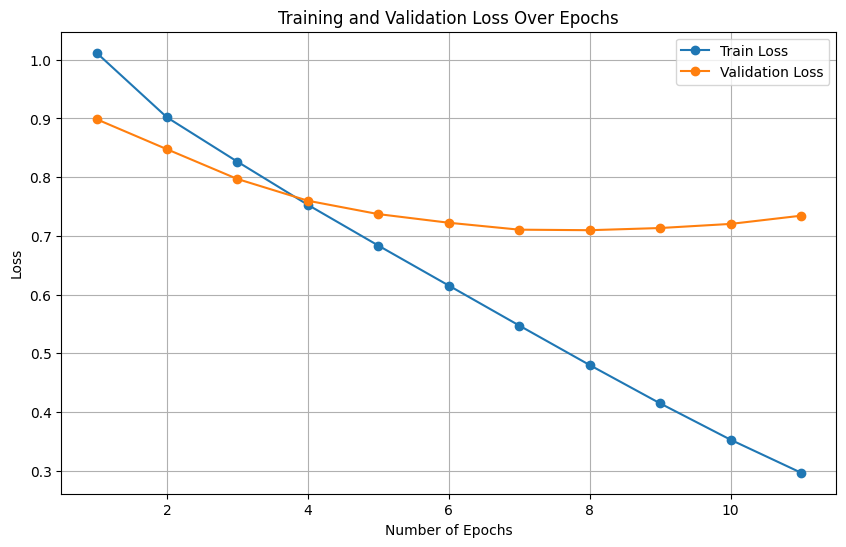

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

data = {
    'Number of Epochs': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
    'Train Loss': [1.0119, 0.9018, 0.8263, 0.7528, 0.6834, 0.6153, 0.5472, 0.4799, 0.4146, 0.3527, 0.2965],
    'Validation Loss': [0.8987, 0.8475, 0.7968, 0.7598, 0.7370, 0.7223, 0.7105, 0.7096,  0.7133, 0.7203, 0.7343]
}

df = pd.DataFrame(data)
print(df)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df['Number of Epochs'], df['Train Loss'], label='Train Loss', marker='o')
plt.plot(df['Number of Epochs'], df['Validation Loss'], label='Validation Loss', marker='o')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#encoder.load_weights("/content/drive/MyDrive/DL Project/encoder_summary_2.h5")
#decoder.load_weights("/content/drive/MyDrive/DL Project/decoder_summary_2.h5")

In [ ]:
encoder.load_weights("/content/drive/MyDrive/DL Project/encoder_summary.h5")
decoder.load_weights("/content/drive/MyDrive/DL Project/decoder_summary.h5")

In [ ]:
def predict_sentence(en_input):
    eng_sequence = eng_tokenizer.texts_to_sequences([en_input])
    en_input = pad_sequences(eng_sequence, maxlen=max_length_text, padding='post')
    hidden_state, next_h, next_c = encoder(en_input)

    curr_token = np.zeros((1, 1))
    curr_token[0, 0] = mar_tokenizer.word_index['startseq']
    pred_sentence = ''

    for i in range(max_length_text):
        output, next_h, next_c, _ = decoder(curr_token, hidden_state, next_h, next_c)
        next_token = np.argmax(output[:, 0, :], axis=1)[0]
        next_word = mar_tokenizer.index_word[next_token]
        if next_word == 'endseq':
            break
        else:
            pred_sentence += ' ' + next_word
            curr_token[0, 0] = next_token

    return pred_sentence.strip()

# Example usage:

X_test="Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as 'Jumbo'"
#X_test="This cat food was recommended by my vet because my 13 year old Cleo Cat was having trouble keeping any food down and was loosing weight.  It stopped her problems.  She doesn't eat as much as before since she seems to be more satisfied after eating which helps justify the added price.  It aids in digestion since the...ok sorry...smells are gone if ya know what I mean.  Had to add that so anyone experiencing problems with their cats can see there are a lot of benifits from this cat food."
input_text = X_test

t_summary="Not as Advertised"
#t_summary="Perfect Cat Food For Older Cats!"
prediction = predict_sentence(input_text)

from textwrap import fill
print(f'Input text:{fill(input_text, width=100)}')

#print(f'Input text: {input_text}')
#print actual summary for the test example
print(f'Actual summary: {t_summary}')

print(f'Predicted summary: {prediction}')


Input text:Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted.
Not sure if this was an error or if the vendor intended to represent the product as 'Jumbo'
Actual summary: Not as Advertised
Predicted summary: not what i expected


In [ ]:
!pip install rouge

In [ ]:
#calculate rouge score
from rouge import Rouge
rouge = Rouge()
scores = rouge.get_scores(prediction, X_test)
print(scores)

#calculate bleu score
from nltk.translate.bleu_score import sentence_bleu
reference = X_test.split()
candidate = prediction.split()
score = sentence_bleu(reference, candidate)
print(score)

#print rougue scores in a df
rouge_df = pd.DataFrame(scores)
rouge_df






[{'rouge-1': {'r': 0.02877697841726619, 'p': 0.5, 'f': 0.05442176767828221}, 'rouge-2': {'r': 0.004694835680751174, 'p': 0.14285714285714285, 'f': 0.00909090847479343}, 'rouge-l': {'r': 0.02158273381294964, 'p': 0.375, 'f': 0.040816325501411475}}]
0


,rouge-1,rouge-2,rouge-l
0,"{'r': 0.02877697841726619, 'p': 0.5, 'f': 0.05442176767828221}","{'r': 0.004694835680751174, 'p': 0.14285714285714285, 'f': 0.00909090847479343}","{'r': 0.02158273381294964, 'p': 0.375, 'f': 0.040816325501411475}"


In [ ]:
print(data['ProductId'][19])

B001GVISJM


In [ ]:
#write a code to take the product id as input and give the summary of the product as output. Take all the reviews of that product, concatenate them and give it as input to the model. The output of the model will be the summary of the product.
#use the same model which we have used in the above code
#load the data



#convert the product id to string type
data['ProductId'] = data['ProductId'].astype(str)

#take the product id as input
product_id = input("Enter the product id: ")
#concatenate all the reviews of that product
data2 = data[data['ProductId'] == product_id]



#concatenate all the reviews of that product
data3 = data2['Text'].str.cat(sep=' ')


Enter the product id: B001GVISJM


In [ ]:
#predict the summary
prediction = predict_sentence(data3)
#summary for proudct id selected
actual_summary= data2['Summary'].str.cat(sep=' ')

from textwrap import fill
print(f'Review:{fill(input_text, width=100)}')
#print(f'Review:{data3}')
print(f'Actual summary: {actual_summary}')
print(f'Predicted summary: {prediction}')

Review:This cat food was recommended by my vet because my 13 year old Cleo Cat was having trouble keeping
any food down and was loosing weight.  It stopped her problems.  She doesn't eat as much as before
since she seems to be more satisfied after eating which helps justify the added price.  It aids in
digestion since the...ok sorry...smells are gone if ya know what I mean.  Had to add that so anyone
experiencing problems with their cats can see there are a lot of benifits from this cat food.
Actual summary: startseq fresh and greasy! endseq startseq strawberry twizzlers - yummy endseq startseq lots of twizzlers, just what you expect. endseq startseq poor taste endseq startseq love it! endseq startseq great sweet candy! endseq startseq home delivered twizlers endseq startseq always fresh endseq startseq twizzlers endseq startseq delicious product! endseq startseq twizzlers endseq startseq please sell these in mexico!! endseq startseq twizzlers - strawberry endseq startseq nasty no flav

In [ ]:
# Transformers
from transformers import BartTokenizer, BartForConditionalGeneration      # BERT Tokenizer and architecture
from transformers import Seq2SeqTrainer, Seq2SeqTrainingArguments         # These will help us to fine-tune our model
from transformers import pipeline                                         # Pipeline
from transformers import DataCollatorForSeq2Seq                           # DataCollator to batch the data
import torch                                                              # PyTorch
import evaluate                                                           # Hugging Face's library for model evaluation


# Other NLP libraries
from textblob import TextBlob                                             # This is going to help us fix spelling mistakes in texts
from sklearn.feature_extraction.text import TfidfVectorizer               # This is going to helps identify the most common terms in the corpus
import re                                                                 # This library allows us to clean text data
import nltk                                                               # Natural Language Toolkit
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
data_copy= pd.read_csv('/content/drive/MyDrive/DL Project/Reviews.csv', nrows=20000)

In [ ]:
data_copy.head()

In [ ]:
describe_df(data_copy)


DataFrame shape: (20000, 10)

20,000 samples

10 attributes

Missing Data: 
Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
dtype: int64

Duplicates: 0

Data Types: 
Id                         int64
ProductId                 object
UserId                    object
ProfileName               object
HelpfulnessNumerator       int64
HelpfulnessDenominator     int64
Score                      int64
Time                       int64
Summary                   object
Text                      object
dtype: object

Categorical Features: 
ProductId, UserId, ProfileName, Summary, Text

Continuous Features: 
Id, HelpfulnessNumerator, HelpfulnessDenominator, Score, Time

Binary Features: 
None

DataFrame Head: 



,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...



DataFrame Tail: 



,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
19995,19996,B002C50X1M,A1XRXZI5KOMVDD,"KAF1958 ""amandaf0626""",0,0,4,1307664000,Crispy and tart,Deep River Salt & Vinegar chips are thick and ...
19996,19997,B002C50X1M,A7G9M0IE7LABX,Kevin,0,0,5,1307059200,Exceeded my expectations. One of the best chip...,I was very skeptical about buying a brand of c...
19997,19998,B002C50X1M,A38J5PRUDESMZF,ray,0,0,5,1305763200,"Awesome Goodness! (deep river kettle chips, sw...",Before you turn to other name brands out there...
19998,19999,B002C50X1M,A17TPOSAG43GSM,Herrick,0,0,3,1303171200,"Pretty good, but prefer other jalapeno chips","I was expecting some ""serious flavor"" as it wa..."
19999,20000,B002C50X1M,A3LWC833HQIG7J,austin_Larry,0,0,5,1295568000,"Excellent chips, full of flavor and just the r...",I purchased the Salt and Vinegar chips and hav...


In [ ]:
#drop nulls and na
data_copy.dropna(inplace=True)
describe_df(data_copy)


DataFrame shape: (20000, 10)

20,000 samples

10 attributes

Missing Data: 
Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
dtype: int64

Duplicates: 0

Data Types: 
Id                         int64
ProductId                 object
UserId                    object
ProfileName               object
HelpfulnessNumerator       int64
HelpfulnessDenominator     int64
Score                      int64
Time                       int64
Summary                   object
Text                      object
dtype: object

Categorical Features: 
ProductId, UserId, ProfileName, Summary, Text

Continuous Features: 
Id, HelpfulnessNumerator, HelpfulnessDenominator, Score, Time

Binary Features: 
None

DataFrame Head: 



,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...



DataFrame Tail: 



,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
19995,19996,B002C50X1M,A1XRXZI5KOMVDD,"KAF1958 ""amandaf0626""",0,0,4,1307664000,Crispy and tart,Deep River Salt & Vinegar chips are thick and ...
19996,19997,B002C50X1M,A7G9M0IE7LABX,Kevin,0,0,5,1307059200,Exceeded my expectations. One of the best chip...,I was very skeptical about buying a brand of c...
19997,19998,B002C50X1M,A38J5PRUDESMZF,ray,0,0,5,1305763200,"Awesome Goodness! (deep river kettle chips, sw...",Before you turn to other name brands out there...
19998,19999,B002C50X1M,A17TPOSAG43GSM,Herrick,0,0,3,1303171200,"Pretty good, but prefer other jalapeno chips","I was expecting some ""serious flavor"" as it wa..."
19999,20000,B002C50X1M,A3LWC833HQIG7J,austin_Larry,0,0,5,1295568000,"Excellent chips, full of flavor and just the r...",I purchased the Salt and Vinegar chips and hav...


In [ ]:
data_copy['Text'] = data_copy['Text'].apply(lambda x: remove_urls(x))
data_copy['Summary'] = data_copy['Summary'].apply(lambda x: remove_urls(x))

#remove html tags
data_copy['Text'] = data_copy['Text'].apply(lambda x: remove_html(x))
data_copy['Summary'] = data_copy['Summary'].apply(lambda x: remove_html(x))


In [ ]:
#use the Datasets library to convert our Pandas Dataframes to Datasets
dataset = Dataset.from_pandas(data_copy)

#view the first 5 rows of the dataset
print(dataset)


Dataset({
    features: ['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator', 'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
    num_rows: 20000
})


In [ ]:
dataset[0]

In [ ]:
# Loading summarization pipeline with the bart-large-cnn model
summarizer = pipeline('summarization', model = 'facebook/bart-large-xsum')

In [ ]:
news = '''Bobi, the world’s oldest dog ever, has died after reaching the almost inconceivable age of 31 years and 165 days, said Guinness World Records (GWR) on Monday.
His death at an animal hospital on Friday was initially announced by veterinarian Dr. Karen Becker.
She wrote on Facebook that “despite outliving every dog in history, his 11,478 days on earth would never be enough, for those who loved him.”
There were many secrets to Bobi’s extraordinary old age, his owner Leonel Costa told GWR in February. He always roamed freely, without a leash or chain, lived in a “calm, peaceful” environment and ate human food soaked in water to remove seasonings, Costa said.
He spent his whole life in Conqueiros, a small Portuguese village about 150 kilometers (93 miles) north of the capital Lisbon, often wandering around with cats.
Bobi was a purebred Rafeiro do Alentejo – a breed of livestock guardian dog – according to his owner. Rafeiro do Alentejos have a life expectancy of about 12-14 years, according to the American Kennel Club.
But Bobi lived more than twice as long as that life expectancy, surpassing an almost century-old record to become the oldest living dog and the oldest dog ever – a title which had previously been held by Australian cattle-dog Bluey, who was born in 1910 and lived to be 29 years and five months old.
However, Bobi’s story almost had a different ending.
When he and his three siblings were born in the family’s woodshed, Costa’s father decided they already had too many animals at home.
Costa and his brothers thought their parents had taken all the puppies away to be destroyed. However, a few sad days later, they found Bobi alive, safely hidden in a pile of logs.
The children hid the puppy from their parents and, by the time Bobi’s existence became known, he was too old to be put down and went on to live his record-breaking life.
His 31st birthday party in May was attended by more than 100 people and a performing dance troupe, GWR said.
His eyesight deteriorated and walking became harder as Bobi grew older but he still spent time in the backyard with the cats, rested more and napped by the fire.
“Bobi is special because looking at him is like remembering the people who were part of our family and unfortunately are no longer here, like my father, my brother, or my grandparents who have already left this world,” Costa told GWR in May. “Bobi represents those generations.”
'''
summarizer(news)

In [ ]:
text1='''I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than most.
1'''
text2='''Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as "Jumbo".'''


In [ ]:

#print text 1 and output of summarizer
from textwrap import fill
print(f'Review:{fill(text1, width=50)}')
summarizer(text1)

Your max_length is set to 62, but your input_length is only 58. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=29)


Review:I have bought several of the Vitality canned dog
food products and have found them all to be of
good quality. The product looks more like a stew
than a processed meat and it smells better. My
Labrador is finicky and she appreciates this
product better than most. 1


[{'summary_text': 'Vitality canned dog food is a good option for those with finicky pets.'}]

In [ ]:
#print text 1 and output of summarizer
from textwrap import fill
print(f'Review:{fill(text2, width=50)}')

summarizer(text2)

Your max_length is set to 62, but your input_length is only 43. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=21)


Review:Product arrived labeled as Jumbo Salted
Peanuts...the peanuts were actually small sized
unsalted. Not sure if this was an error or if the
vendor intended to represent the product as
"Jumbo".


[{'summary_text': 'A customer at a US supermarket has had a bit of a shock after ordering a box of peanuts.'}]

In [ ]:
checkpoint = 'facebook/bart-large-xsum' # Model
tokenizer = BartTokenizer.from_pretrained(checkpoint) # Loading Tokenizer

In [ ]:
model = BartForConditionalGeneration.from_pretrained(checkpoint) # Loading Model

In [ ]:
print(model) # Visualizing model's architecture

In [ ]:
def preprocess_function(examples):
    inputs = [doc for doc in examples["Text"]]
    model_inputs = tokenizer(inputs, max_length=200, truncation=True)

    # Setup the tokenizer for targets
    with tokenizer.as_target_tokenizer():
        labels = tokenizer(examples["Summary"], max_length=20, truncation=True)

    model_inputs["labels"] = labels["input_ids"]
    return model_inputs

In [ ]:
#split the dataset into training and validation and test datasets. we need to store them separately in 3 datasets for training, validation and testing


# Assuming you have already created the 'dataset' using Dataset.from_pandas(df)

# Split the dataset into training, validation, and test sets
raw_datasets = dataset.train_test_split(test_size=0.2, seed=42)

# Access the training, validation, and test sets
train_dataset = raw_datasets['train']
validation_dataset = raw_datasets['test'].train_test_split(test_size=0.5, seed=42)['train']
test_dataset = raw_datasets['test'].train_test_split(test_size=0.5, seed=42)['test']

#print train, validation and test datasets
print(train_dataset)
print(validation_dataset)
print(test_dataset)


Dataset({
    features: ['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator', 'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
    num_rows: 16000
})
Dataset({
    features: ['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator', 'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
    num_rows: 2000
})
Dataset({
    features: ['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator', 'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
    num_rows: 2000
})


In [ ]:
# Applying preprocess_function to the datasets
tokenized_train = train_dataset.map(preprocess_function, batched=True,
                               remove_columns=['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator', 'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text']) # Removing features

tokenized_test = test_dataset.map(preprocess_function, batched=True,
                               remove_columns=['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator', 'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text']) # Removing features

tokenized_val = validation_dataset.map(preprocess_function, batched=True,
                               remove_columns=['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator', 'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text']) # Removing features

# Printing results
print('\n' * 3)
print('Preprocessed Training Dataset:\n')
print(tokenized_train)
print('\n' * 2)
print('Preprocessed Test Dataset:\n')
print(tokenized_test)
print('\n' * 2)
print('Preprocessed Validation Dataset:\n')
print(tokenized_val)

Map:   0%|          | 0/16000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]





Preprocessed Training Dataset:

Dataset({
    features: ['input_ids', 'attention_mask', 'labels'],
    num_rows: 16000
})



Preprocessed Test Dataset:

Dataset({
    features: ['input_ids', 'attention_mask', 'labels'],
    num_rows: 2000
})



Preprocessed Validation Dataset:

Dataset({
    features: ['input_ids', 'attention_mask', 'labels'],
    num_rows: 2000
})


In [ ]:
# Selecting a sample from the dataset
sample = tokenized_train[0]

# Printing its features
print("input_ids:")
print(sample['input_ids'])
print("\n")
print("attention_mask:")
print(sample['attention_mask'])
print("\n")
print("sample:")
print(sample['labels'])
print("\n")

input_ids:
[0, 100, 2333, 907, 14933, 995, 8, 802, 38, 1017, 860, 42, 689, 187, 24, 300, 97, 372, 6173, 4, 100, 524, 4343, 19, 42, 5820, 4, 1437, 85, 18, 10, 410, 540, 1855, 25339, 87, 14933, 995, 18, 1289, 155, 7317, 734, 2527, 38, 3915, 10, 828, 540, 59, 127, 1928, 821, 12771, 15, 24, 25, 37, 18, 2239, 7, 34431, 55, 4, 22412, 6, 5, 5884, 6, 4045, 17284, 16, 10, 380, 478, 19, 127, 1928, 4, 1437, 91, 14964, 24, 70, 62, 328, 4528, 6523, 7317, 32, 10, 182, 2579, 3626, 7, 442, 127, 308, 689, 13, 123, 4, 2]


attention_mask:
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


sample:
[0, 975, 22383, 8276, 2]




In [ ]:
# Instantiating Data Collator
data_collator = DataCollatorForSeq2Seq(tokenizer, model=model)

In [ ]:
!pip install rouge_score

In [ ]:
metric = load_metric('rouge') # Loading ROUGE Score

In [ ]:
def compute_metrics(eval_pred):
    predictions, labels = eval_pred# Obtaining predictions and true labels

    # Decoding predictions
    decoded_preds = tokenizer.batch_decode(predictions, skip_special_tokens=True)

    # Obtaining the true labels tokens, while eliminating any possible masked token (i.e., label = -100)
    labels = np.where(labels != -100, labels, tokenizer.pad_token_id)
    decoded_labels = tokenizer.batch_decode(labels, skip_special_tokens=True)

    # Rouge expects a newline after each sentence
    decoded_preds = ["\n".join(nltk.sent_tokenize(pred.strip())) for pred in decoded_preds]
    decoded_labels = ["\n".join(nltk.sent_tokenize(label.strip())) for label in decoded_labels]


    # Computing rouge score
    result = metric.compute(predictions=decoded_preds, references=decoded_labels, use_stemmer=True)
    result = {key: value.mid.fmeasure * 100 for key, value in result.items()} # Extracting some results

    # Add mean-generated length
    prediction_lens = [np.count_nonzero(pred != tokenizer.pad_token_id) for pred in predictions]
    result["gen_len"] = np.mean(prediction_lens)

    return {k: round(v, 4) for k, v in result.items()}

In [ ]:
!pip install accelerate -U

In [ ]:
!pip install transformers[torch]

In [ ]:
from transformers import AdamW
from transformers import Seq2SeqTrainer, Seq2SeqTrainingArguments

# Initialize the optimizer with a fixed learning rate
optimizer = AdamW(model.parameters(), lr=2e-7)

training_args = Seq2SeqTrainingArguments(
    output_dir='/content/drive/MyDrive/DL Project/results_bart',
    evaluation_strategy="epoch",
    save_strategy='epoch',
    load_best_model_at_end=True,
    metric_for_best_model='eval_loss',
    seed=42,
    learning_rate=2e-7,
    per_device_train_batch_size=4,
    per_device_eval_batch_size=4,
    gradient_accumulation_steps=2,
    weight_decay=0.01,
    save_total_limit=2,
    num_train_epochs=10,

    predict_with_generate=True,
    fp16=True,
    report_to="none"
)

# Note: Removed the scheduler creation as it's not used in this code snippet


In [ ]:
# Defining Trainer with the SchedulerCallback
trainer = Seq2SeqTrainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_train,
    eval_dataset=tokenized_test,
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics,
    optimizers=(optimizer,None),


)

In [ ]:
trainer.train() # Training model

Epoch,Training Loss,Validation Loss,Rouge1,Rouge2,Rougel,Rougelsum,Gen Len
1,2.804600,3.013746,14.274100,4.423300,13.713500,13.685300,13.412500
2,2.705000,2.977087,14.807200,4.841100,14.277900,14.261900,13.393500
3,2.665300,2.965230,14.825600,4.903100,14.236200,14.226600,13.397500
4,2.642000,2.947522,15.179800,5.007400,14.633100,14.675600,13.444500
5,2.619900,2.954750,15.150700,4.945200,14.550700,14.559400,13.464000
6,2.596700,2.941977,15.422400,5.092200,14.784500,14.801100,13.505000
7,2.610600,2.938452,15.352700,5.005500,14.664900,14.699400,13.462500
8,2.580700,2.936728,15.463900,5.026400,14.791100,14.814800,13.487000


Epoch,Training Loss,Validation Loss,Rouge1,Rouge2,Rougel,Rougelsum,Gen Len
1,2.804600,3.013746,14.274100,4.423300,13.713500,13.685300,13.412500
2,2.705000,2.977087,14.807200,4.841100,14.277900,14.261900,13.393500
3,2.665300,2.965230,14.825600,4.903100,14.236200,14.226600,13.397500
4,2.642000,2.947522,15.179800,5.007400,14.633100,14.675600,13.444500
5,2.619900,2.954750,15.150700,4.945200,14.550700,14.559400,13.464000
6,2.596700,2.941977,15.422400,5.092200,14.784500,14.801100,13.505000
7,2.610600,2.938452,15.352700,5.005500,14.664900,14.699400,13.462500
8,2.580700,2.936728,15.463900,5.026400,14.791100,14.814800,13.487000
9,2.574600,2.923320,15.505400,5.099400,14.835700,14.852800,13.475000
10,2.596900,2.926949,15.552800,5.075200,14.850800,14.876600,13.482000


There were missing keys in the checkpoint model loaded: ['model.encoder.embed_tokens.weight', 'model.decoder.embed_tokens.weight', 'lm_head.weight'].


TrainOutput(global_step=20000, training_loss=2.643412109375, metrics={'train_runtime': 9993.7696, 'train_samples_per_second': 16.01, 'train_steps_per_second': 2.001, 'total_flos': 5.094230565214618e+16, 'train_loss': 2.643412109375, 'epoch': 10.0})

In [ ]:
# Evaluating model performance on the tokenized validation dataset
validation = trainer.evaluate(eval_dataset = tokenized_val)
print(validation) # Printing results

{'eval_loss': 2.9097182750701904, 'eval_rouge1': 16.5052, 'eval_rouge2': 5.715, 'eval_rougeL': 15.9222, 'eval_rougeLsum': 15.9299, 'eval_gen_len': 13.469, 'eval_runtime': 352.904, 'eval_samples_per_second': 5.667, 'eval_steps_per_second': 1.417, 'epoch': 10.0}


In [ ]:
import matplotlib.pyplot as plt

# Data from the DataFrame
epochs = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
training_loss = [2.8046, 2.705, 2.6653, 2.642, 2.6199, 2.5967, 2.6106, 2.5807, 2.5746, 2.5547 ]
validation_loss = [3.013746, 2.977087, 2.96523, 2.947522, 2.95475, 2.941977,2.9384,2.9360, 2.9230, 2.8967 ]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(epochs, training_loss, label='Training Loss', marker='o')
plt.plot(epochs, validation_loss, label='Validation Loss', marker='o')

# Adding labels and title
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.grid(True)

# Display the plot
plt.show()



In [ ]:
# Saving model to a custom directory
directory = "/content/drive/MyDrive/DL Project/bart_finetuned_AmazonFineReviews_final"
trainer.save_model(directory)

# Saving model tokenizer
tokenizer.save_pretrained(directory)

('/content/drive/MyDrive/DL Project/bart_finetuned_AmazonFineReviews_final/tokenizer_config.json',
 '/content/drive/MyDrive/DL Project/bart_finetuned_AmazonFineReviews_final/special_tokens_map.json',
 '/content/drive/MyDrive/DL Project/bart_finetuned_AmazonFineReviews_final/vocab.json',
 '/content/drive/MyDrive/DL Project/bart_finetuned_AmazonFineReviews_final/merges.txt',
 '/content/drive/MyDrive/DL Project/bart_finetuned_AmazonFineReviews_final/added_tokens.json')

In [ ]:
# Saving model in .zip format
#shutil.make_archive('bart_finetuned_afr', 'zip', '/content/drive/MyDrive/DL Project/bart_finetuned_AmazonFineReviews_final')
#shutil.move('bart_finetuned_afr.zip', 'bart_finetuned_AmazonFineReviews_final.zip')

'bart_finetuned_AmazonFineReviews_final.zip'

In [ ]:
# Loading summarization pipeline and model
summarizer = pipeline('summarization', model = '/content/drive/MyDrive/DL Project/bart_finetuned_AmazonFineReviews_final')

In [ ]:
# Loading summarization pipeline with the bart-large-cnn model
summarizer2 = pipeline('summarization', model = 'facebook/bart-large-xsum')

In [ ]:
# Obtaining a random example from the validation dataset
validation_dataset[1998]

{'Id': 2178,
 'ProductId': 'B002SW7ZOW',
 'UserId': 'A2CIIHVCG2FXSP',
 'ProfileName': 'YLuvAmazon "YLuvAmazon"',
 'HelpfulnessNumerator': 2,
 'HelpfulnessDenominator': 2,
 'Score': 4,
 'Time': 1268265600,
 'Summary': 'Fine Quality Tea!',
 'Text': 'I love this TEA. It has a very smooth taste and not bitter like other kind of tea. I do agree that the string seems to come apart easily but I can live with that. No big deal! The quality of TEA makes up for that.',
 '__index_level_0__': 2177}

In [ ]:
text = "I think I liked a similar drink but this one is just there. It's bubbly. It's sort of orange flavored. It has a sharpness but there's nothing about it that excites me. It's a good old fashioned carbonated beverage and if it's inexpensive buy it. If it's significantly more expensive than most drinks, leave it. Buy coke instead."
text2 ="I love this TEA. It has a very smooth taste and not bitter like other kind of tea. I do agree that the string seems to come apart easily but I can live with that. No big deal! The quality of TEA makes up for that."
summary = "Good but nothing special"
summary2="Fine Quality Tea!"
generated_summary_ft_bart1 = summarizer(text)
generated_summary_bart1=summarizer2(text)
generated_summary_ft_bart2 = summarizer(text2)
generated_summary_bart2=summarizer2(text2)

Your max_length is set to 62, but your input_length is only 55. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=27)
Your max_length is set to 62, but your input_length is only 55. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=27)


In [ ]:
print('Original Review:\n')
from textwrap import fill
print(fill(text, width=50))

print('\n' * 2)
print('Reference Summary:\n')
print(summary)
print('\n' * 2)
print('Fine Tuned BART Model-generated Summary:\n')
print(generated_summary_ft_bart1)
print('\n' * 2)
print('BART_Model-generated Summary:\n')
print(generated_summary_bart1)

Original Review:

I think I liked a similar drink but this one is
just there. It's bubbly. It's sort of orange
flavored. It has a sharpness but there's nothing
about it that excites me. It's a good old
fashioned carbonated beverage and if it's
inexpensive buy it. If it's significantly more
expensive than most drinks, leave it. Buy coke
instead.



Reference Summary:

Good but nothing special



Fine Tuned BART Model-generated Summary:

[{'summary_text': 'Bubbly, but nothing special'}]



BART_Model-generated Summary:

[{'summary_text': "I'm not a big fan of carbonated drinks but I've had one at work and it's not too bad."}]


In [ ]:
print('Original Review:\n')
from textwrap import fill
print(fill(text2, width=50))

print('\n' * 2)
print('Reference Summary:\n')
print(summary2)
print('\n' * 2)
print('Model-generated Summary:\n')
print(generated_summary_ft_bart2)
print('\n' * 2)
print('BART_Model-generated Summary:\n')
print(generated_summary_bart2)

Original Review:

I love this TEA. It has a very smooth taste and
not bitter like other kind of tea. I do agree that
the string seems to come apart easily but I can
live with that. No big deal! The quality of TEA
makes up for that.



Reference Summary:

Fine Quality Tea!



Model-generated Summary:

[{'summary_text': 'Love this TEA but string seems to come apart easily'}]



BART_Model-generated Summary:

[{'summary_text': 'This is the first time I have tried this kind of tea and I have to say it is very good.'}]


In [ ]:
!pip install ipywidgets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 12.5 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import re
import nltk
import gensim
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from gensim import corpora, models
from ipywidgets import interact, widgets, Output
from IPython.display import display

import warnings
# Ignore all warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

nltk.download('punkt')
nltk.download('stopwords')

# Load your data
data_t = pd.read_csv('/content/drive/MyDrive/DL Project/Reviews.csv', nrows=5000)

# Preprocess the text
def text_preprocessing(data, col):
    data[col] = data[col].astype(str)
    data[col] = data[col].apply(lambda x: x.lower())
    data[col] = data[col].apply(lambda x: re.sub("[^A-Za-z\s]", "", x))
    data[col] = data[col].apply(lambda x: x.replace("\s+", " "))
    data[col] = data[col].apply(lambda x: " ".join([word for word in x.split()]))
    #remove stopwords
    stop_words = set(stopwords.words('english'))
    data[col] = data[col].apply(lambda x: " ".join([word for word in x.split() if word not in stop_words]))
    #remove word 'product'
    data[col] = data[col].apply(lambda x: x.replace("product", ""))
    return data

data_t = text_preprocessing(data_t, 'Text')

# Convert the text to string type
data_t['Text'] = data_t['Text'].astype(str)
data_t['Summary'] = data_t['Summary'].astype(str)

# Perform topic modelling on the reviews of each product
def perform_topic_analysis_per_product(data, product_col, text_col, num_topics=10):
    product_topics_list = []

    unique_products = data[product_col].unique()

    for product_id in unique_products:
        product_data = data[data[product_col] == product_id]

        # Tokenize the text for each product
        product_data[text_col] = product_data[text_col].apply(word_tokenize)

        # Create Dictionary
        id2word = corpora.Dictionary(product_data[text_col])

        # Create Corpus
        texts = product_data[text_col]

        # Term Document Frequency
        corpus = [id2word.doc2bow(text) for text in texts]

        # Build LDA model with only 5 words per topic
        lda_model = gensim.models.ldamodel.LdaModel(
            corpus=corpus,
            id2word=id2word,
            num_topics=num_topics,
            random_state=100,
            update_every=1,
            chunksize=100,
            passes=10,
            alpha='auto',
            per_word_topics=True
        )


        # Get topics for the current product
        topics = lda_model.print_topics(num_words=10)

        # Check if topics are available
        if topics is not None:
            # Append to the list
            product_topics_list.append({
                'ProductID': product_id,
                'Text': product_data['Text'].tolist(),
                'Summary': product_data['Summary'].tolist(),
                'Topics': topics
            })
        else:
            # Append with empty topics list
            product_topics_list.append({
                'ProductID': product_id,
                'Text': product_data['Text'].tolist(),
                'Summary': product_data['Summary'].tolist(),
                'Topics': []
            })

    # Create a DataFrame from the list
    product_topics_df = pd.DataFrame(product_topics_list)

    return product_topics_df

# Function to display topics for a specific product
def display_topics(product_id):
    product_data = result_df[result_df['ProductID'] == product_id]

    if not product_data.empty:
        visualize_topics(product_data['Topics'].values[0])
    else:
        print(f"No data found for Product ID: {product_id}")

# Function to visualize topics
def visualize_topics(topics):
    topics_data = {'Topic': [], 'Words': []}

    for topic in topics:
        topic_words = re.findall(r'"(.*?)"', topic[1])  # Extract words within double quotes
        topics_data['Topic'].append(f"Topic {topic[0]}")
        topics_data['Words'].append(', '.join(topic_words))

    topics_df = pd.DataFrame(topics_data)

    pd.set_option('display.max_colwidth', 1000)

    display(topics_df)

# Perform topic analysis for each product
result_df = perform_topic_analysis_per_product(data_t, 'ProductId', 'Text')


# Create a dropdown widget for selecting Product ID
product_id_dropdown = widgets.Dropdown(
    options=result_df['ProductID'].unique(),
    description='Product ID:',
)

# Create an interactive display
interactive_plot = interact(display_topics, product_id=product_id_dropdown)
display(interactive_plot)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


interactive(children=(Dropdown(description='Product ID:', options=('B001E4KFG0', 'B00813GRG4', 'B000LQOCH0', '…

<function __main__.display_topics(product_id)>